### 간단한 인공신경망 만들기

In [1]:
# %pip install torchviz
from torchviz import make_dot

Linear(in_features=1, out_features=1, bias=True)
Parameter containing:
tensor([[0.2714]], requires_grad=True)
Parameter containing:
tensor([0.9120], requires_grad=True)
tensor([1.1834], grad_fn=<ViewBackward0>)
tensor([1.1834], grad_fn=<AddBackward0>)


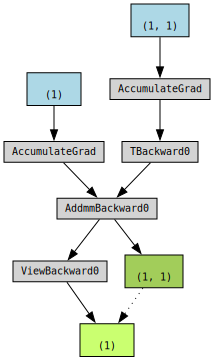

In [1]:
import torch
from torch import nn
from torchviz import make_dot

x = torch.tensor([1.])
model=nn.Linear(1, 1) # 입력 node 한 개, 출력 node 한 개인 layer 만듦
print(model)

print(model.weight) # 만들면서 initialize 함
print(model.bias)

y=model(x)
print(y)

y2 = x @ model.weight + model.bias # 식으로 나타내 본다면
print(y2)

make_dot(y)

Parameter containing:
tensor([[ 0.2447],
        [ 0.4313],
        [-0.0043]], requires_grad=True)
Parameter containing:
tensor([ 0.1758, -0.5806,  0.3288], requires_grad=True)
Parameter containing:
tensor([[ 0.1749, -0.4186, -0.5735]], requires_grad=True)
Parameter containing:
tensor([-0.2062], requires_grad=True)

tensor([ 0.4205, -0.1493,  0.3244], grad_fn=<ViewBackward0>)
tensor([-0.2562], grad_fn=<ViewBackward0>)
tensor([-0.2562], grad_fn=<AddBackward0>)


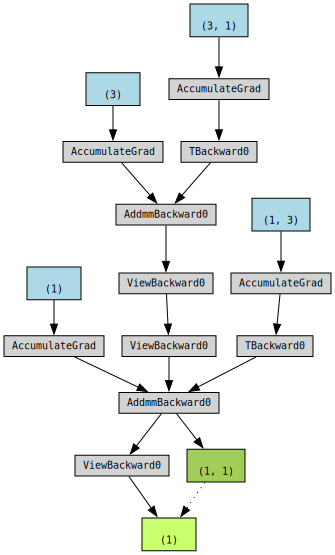

In [7]:
fc1=nn.Linear(1,3) # fully-connected layer
fc2=nn.Linear(3,1)

print(fc1.weight) # 3개
print(fc1.bias) # 3개
print(fc2.weight) # 3개
print(fc2.bias) # 1개
print()

x=torch.tensor([1.])
x=fc1(x)
print(x)
y=fc2(x)
print(y)

x=torch.tensor([1.])
y2=(x@fc1.weight.T + fc1.bias) @ fc2.weight.T + fc2.bias
print(y2)

# input size: 1
# fc1.weight.T size: 1×3 (fc1.weight size: 3×1)
# fc1.bias size: 3
# fc2.weight.T size: 3×1 (fc2.weight size: 1×3)
# fc2.bias size: 1

make_dot(y)

tensor([-1.4041,  0.7363])
tensor([ 1.1693, -0.0474, -0.2033], grad_fn=<ViewBackward0>)


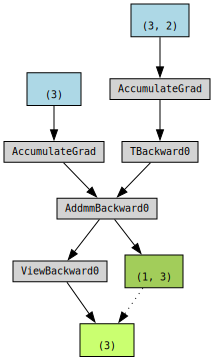

In [18]:
model = nn.Linear(2, 3)
x=torch.randn(2)
print(x)
print(model(x))
# nn.Linear는 데이터의 shape의 마지막 차원이 '채'로(1D data) 들어오길 기대하는 녀석임; 채=채널
# 입력노드 하나가 곧 하나의 채널(피쳐)값을 의미
# '채널'은 특정 유형의 정보를 전달하는 통로. 즉, 피쳐(특징)과 의미적으로 거의 비슷함
make_dot(model(x))

tensor([[-0.2416, -0.1080],
        [-0.8601, -1.7620],
        [-1.1050,  0.0241],
        [ 0.5441,  0.1881],
        [-0.6514,  2.2586]])
tensor([[ 0.7609, -0.0841, -0.4308],
        [ 0.2269,  0.5156,  0.1745],
        [ 1.3832, -0.5074, -0.6885],
        [ 0.4279,  0.0861, -0.3844],
        [ 2.3472, -1.4748, -1.5938]], grad_fn=<AddmmBackward0>)
torch.Size([4, 5, 3])
torch.Size([2, 3, 6, 4, 5, 3])


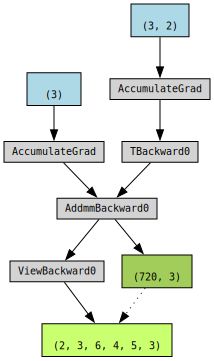

In [ ]:
model = nn.Linear(2, 3)
# 따라서, 데이터 여러 개를 통과시키고 싶다면 개×체 의 형태로 줘야함 ('채×개'나 '개*채' 이런 식으로 말고)
x=torch.randn(5,2) # 개×채 => 두 개의 채널 값(키, 몸무게)을 가지는 데이터(사람) 5개

print(x)
print(model(x))

x=torch.randn(4,5,2) # nn.Linear는 이걸 개×개×채로 인식함
print(model(x).shape) # 4×5×3 (마지막 채널 수가 3으로 바뀜)

x=torch.randn(2,3,6,4,5,2)
print(model(x).shape)

make_dot(model(x))

# 그렇다면 왜 웨이트 행렬에 T 시켰나? weight도 데이터와 마찬가지로 개×채 형태로 만들기 위함
# 예를 들어, nn.Linear(2,3)이면 두 채널 값을 사용하는 세 '개'의 필터를 통과하는 것이라 3×2가 됨
# 데이터의 개체는 두 채널 값을 가지는 다섯개의 데이터 (5×2)
# 웨이트의 개체는 두 채널 값을 이용하는 세 개의 필터 (3×2)


tensor([ 0.1371, -0.4617, -1.3019], grad_fn=<ViewBackward0>)
tensor([0.0694], grad_fn=<ViewBackward0>)
tensor([0.0694], grad_fn=<ViewBackward0>)


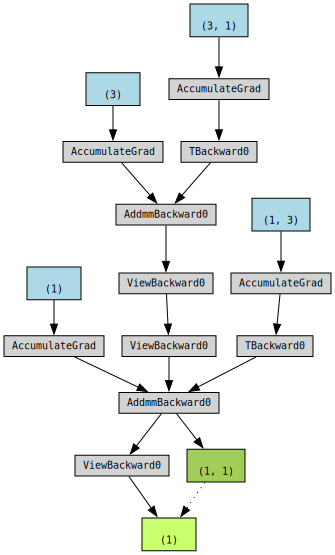

In [ ]:
fc1=nn.Linear(1,3)
fc2=nn.Linear(3,1)

x=torch.tensor([1.])
x=fc1(x)
print(x)
x=fc2(x)
print(x)

model = nn.Sequential(fc1, fc2) # layer 풀칠
x=torch.tensor([1.])
print(model(x))

make_dot(model(x)) # Sequential은 딱히 표시 안 함

In [ ]:
model = nn.Sequential(nn.Linear(2,5), # (in_채널, out_채널) 니까 연결되는 부분이 같아야 함
                      nn.Lineare(5,10),
                      nn.Linear(10,3))

x=torch.randn(5,2)
print(x)
print(model(x))

tensor([[0.3789, 0.3431, 0.4781],
        [0.3851, 0.3515, 0.4858],
        [0.3747, 0.3384, 0.4790],
        [0.3794, 0.3442, 0.4807],
        [0.3849, 0.3510, 0.4886]], grad_fn=<SigmoidBackward0>)


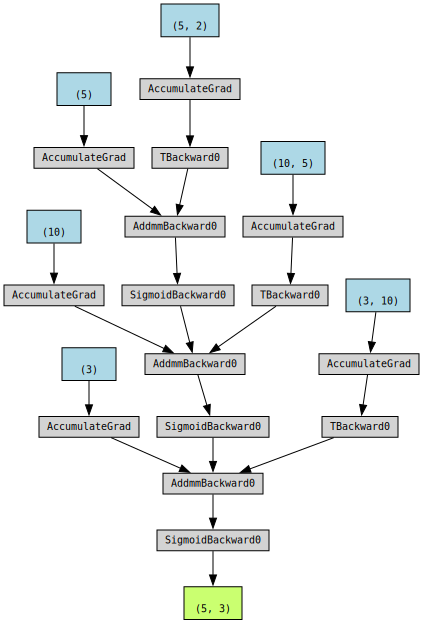

In [25]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1=nn.Linear(2,5)
        self.fc2=nn.Linear(5,10)
        self.fc3=nn.Linear(10,3)
        self.act=nn.Sigmoid()

    def forward(self, x):
        x=self.fc1(x)
        x=self.act(x)
        x=self.fc2(x)
        x=self.act(x)
        x=self.fc3(x)
        x=self.act(x)
        return x
    
model = MyModel()
x = torch.randn(5,2)
y = model(x) # model.forward(x) (nn.Module의 __call__에서 forward를 통과시킴) (__call__은 인스턴스()로 호출하는 메서드)
print(y)

make_dot(y)

tensor([[0.5075, 0.5069, 0.6745],
        [0.5063, 0.5077, 0.6788],
        [0.5087, 0.5067, 0.6817],
        [0.5085, 0.5067, 0.6796],
        [0.5100, 0.5059, 0.6791]], grad_fn=<SigmoidBackward0>)


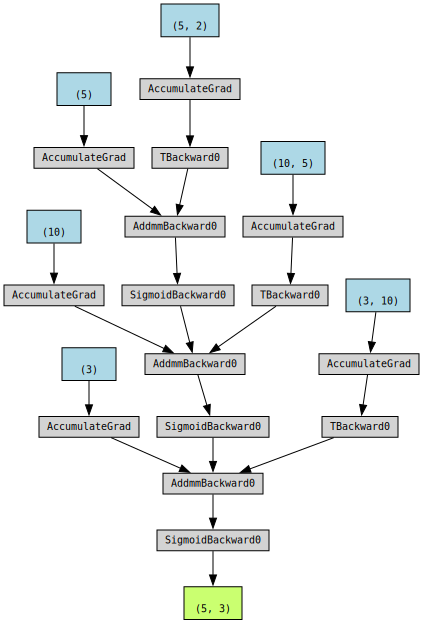

In [27]:
class MyModel2(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear = nn.Sequential(nn.Linear(2,5),
                                    nn.Sigmoid(),
                                    nn.Linear(5,10),
                                    nn.Sigmoid(),
                                    nn.Linear(10,3),
                                    nn.Sigmoid())
    
    def forward(self, x):
        x=self.linear(x)
        return x
    
model2 = MyModel2()
x = torch.randn(5,2)
y = model2(x) # model.forward(x) (nn.Module의 __call__에서 forward를 통과시킴) (__call__은 인스턴스()로 호출하는 메서드)
print(y)

make_dot(y)

In [33]:
print(model2)
print(model2.linear[0].weight)
print(model2.linear[-2].bias)
# print(model2.linear[-1].weight) # 마지막 sigmoid는 bias, weight 없음

MyModel2(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=5, out_features=10, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=10, out_features=3, bias=True)
    (5): Sigmoid()
  )
)
Parameter containing:
tensor([[-0.0533,  0.3971],
        [ 0.3829,  0.2638],
        [ 0.6797, -0.5536],
        [ 0.3342, -0.6759],
        [-0.3365, -0.5910]], requires_grad=True)
Parameter containing:
tensor([-0.2956,  0.1890,  0.2202], requires_grad=True)


In [ ]:
num = sum([p.numel() for p in model.parameters() if p.requires_grad])
print(num) # 5+2×5 + 10+5×10 + 3+10×3 = 108 (bias개수 + weight개수(input채널×output채널))

108


### Weight initialization (수업은 X)

In [36]:
# 필기용 - He initializatioin 이 공식 문서랑 다르다? => paper에 맞게 구현됐고 torch 공식 문서만 틀림
import torch
from torch import nn
Fin=5000
Fout=1000
w = torch.zeros(100, Fin)
nn.init.kaiming_uniform_(w, mode='fan_in', nonlinearity='relu') # forward pass에서 값의 범위를 유지시켜주기 위함
print(w.std())
print(torch.sqrt(torch.tensor(2/Fin)))
w = torch.zeros(Fout, 100)
nn.init.kaiming_uniform_(w, mode='fan_out', nonlinearity='relu') # backward pass에서 값의 범위를 유지시켜주기 위함
print(w.std())
print(torch.sqrt(torch.tensor(2/Fout)))

# CNN
N=32
C=64
H=6
W=10
w = torch.zeros(N,C, H, W)
nn.init.kaiming_uniform_(w, mode='fan_in', nonlinearity='relu')
print(w.std())
print(torch.sqrt(torch.tensor(2/(C*H*W))))

w = torch.zeros(N,C, H, W)
nn.init.kaiming_uniform_(w, mode='fan_out', nonlinearity='relu')
print(w.std())
print(torch.sqrt(torch.tensor(2/(N*H*W))))

tensor(0.0200)
tensor(0.0200)
tensor(0.0447)
tensor(0.0447)
tensor(0.0228)
tensor(0.0228)
tensor(0.0323)
tensor(0.0323)
